<a href="https://colab.research.google.com/github/ark150/PracticaSIDI2Semana1/blob/master/SistDist2_semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semana 5
resumen de la semana 4


In [0]:
import numpy as np
import dask.array as da


In [0]:
a = np.random.rand(100000)
a_dask = da.from_array(a, chunks=len(a)//4)

In [6]:
print(a_dask.chunks)

((25000, 25000, 25000, 25000),)


In [7]:
a.shape

(100000,)

In [8]:
a_dask.ndim

1

In [11]:
a_dask.mean().compute()

0.5008159016519146

In [0]:
a_dask.mean().visualize(rankdir='LR')

In [0]:
ts = np.array([49,51,60,54,47,50,64,58,47,43,50,63,67,68,64,48,55,46,66,51,52])
np.savetxt('temp_max.csv', ts.astype(int), fmt='%i')

In [17]:
ts

array([49, 51, 60, 54, 47, 50, 64, 58, 47, 43, 50, 63, 67, 68, 64, 48, 55,
       46, 66, 51, 52])

In [0]:
semanas = ts.reshape([3,7])

In [20]:
semanas

array([[49, 51, 60, 54, 47, 50, 64],
       [58, 47, 43, 50, 63, 67, 68],
       [64, 48, 55, 46, 66, 51, 52]])

In [21]:
semanas.ndim

2

In [0]:
data=np.genfromtxt('https://www1.ncdc.noaa.gov/pub/data/ccd-data/hghtmp15.dat', usecols=(2,3,4,5),skip_header=5, dtype=np.int64)

In [23]:
data.ndim

2

In [24]:
data.shape

(259, 4)

In [0]:
data_dask= da.from_array(data, chunks=(259,2))

In [27]:
data_dask.chunks

((259,), (2, 2))

In [0]:
import h5py, time

In [29]:
!wget https://github.com/htapiagroup/sistdist/raw/mca2019/2014-01-30.hdf5

--2019-06-04 15:57:15--  https://github.com/htapiagroup/sistdist/raw/mca2019/2014-01-30.hdf5
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/htapiagroup/sistdist/mca2019/2014-01-30.hdf5 [following]
--2019-06-04 15:57:15--  https://raw.githubusercontent.com/htapiagroup/sistdist/mca2019/2014-01-30.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84673 (83K) [application/octet-stream]
Saving to: ‘2014-01-30.hdf5’

2014-01-30.hdf5     100%[===================>]  82.69K  --.-KB/s    in 0.02s   

2019-06-04 15:57:15 (3.30 MB/s) - ‘2014-01-30.hdf5’ saved [84673/84673]



In [0]:
f = h5py.File('2014-01-30.hdf5','r')

In [35]:
for key in f.keys():
  print(key)

t2m


In [36]:
datos =f['t2m']
type(datos)

h5py._hl.dataset.Dataset

In [37]:
datos

<HDF5 dataset "t2m": shape (180, 360), type "<f8">

In [38]:
datos.ndim

2

In [39]:
datos.shape

(180, 360)

In [0]:
datos_dask = da.from_array(datos, chunks=(15,360))

In [41]:
datos_dask.chunks

((15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15), (360,))

In [44]:
datos_dask.min().compute()

12.25

In [0]:
min =datos_dask.min().compute()
max=datos_dask.max().compute()

In [46]:
min,max

(12.25, 237.5)

In [0]:
import matplotlib.pyplot as plt

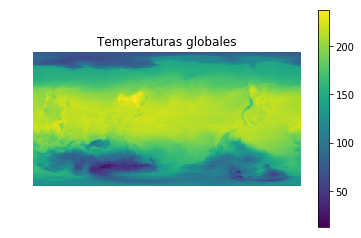

In [50]:
plt.imshow(datos_dask[:,:], origin='lower', vmin=min, vmax=max);
plt.title('Temperaturas globales')
plt.axis('off')
plt.colorbar()

#apilando (stacking) arreglos

In [51]:
a= np.ones(3)
b=2*a
c=3*a
print(a,'\n')
print(b,'\n')
print(c,'\n')

[1. 1. 1.] 

[2. 2. 2.] 

[3. 3. 3.] 



In [53]:
np.stack([a,b]).shape

(2, 3)

In [57]:
np.stack([a,b])

array([[1., 1., 1.],
       [2., 2., 2.]])

In [59]:
np.stack([a,b], axis=1)

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [61]:
np.stack([a,b,c])

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

In [62]:
np.stack([a,b,c], axis=1)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [63]:
x= np.stack([a,b])
y= np.stack([b,c])
z= np.stack([c,a])
print(x,'\n')
print(y,'\n')
print(z,'\n')

[[1. 1. 1.]
 [2. 2. 2.]] 

[[2. 2. 2.]
 [3. 3. 3.]] 

[[3. 3. 3.]
 [1. 1. 1.]] 



In [64]:
np.stack([x,y])

array([[[1., 1., 1.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [3., 3., 3.]]])

In [65]:
np.stack([x,y,z])

array([[[1., 1., 1.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [3., 3., 3.]],

       [[3., 3., 3.],
        [1., 1., 1.]]])

In [66]:
np.stack([x,y,z], axis=1)

array([[[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]],

       [[2., 2., 2.],
        [3., 3., 3.],
        [1., 1., 1.]]])

In [67]:
np.stack([x,y,z], axis=1).ndim

3

In [68]:
np.stack([x,y,z], axis=1).shape

(2, 3, 3)

##Dataframe

In [70]:
import dask
df= dask.datasets.timeseries()
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [0]:
import os
import datetime
if not os.path.exists('data'):
  os.mkdir('data')

def name(i):
    """ fecha para archivo dado indice i"""
    return str(datetime.date(2001,1,1) + i*datetime.timedelta(days=1))
  

In [92]:
df.to_csv('data/*.csv', name_function=name)

['data/2001-01-01.csv',
 'data/2001-01-02.csv',
 'data/2001-01-03.csv',
 'data/2001-01-04.csv',
 'data/2001-01-05.csv',
 'data/2001-01-06.csv',
 'data/2001-01-07.csv',
 'data/2001-01-08.csv',
 'data/2001-01-09.csv',
 'data/2001-01-10.csv',
 'data/2001-01-11.csv',
 'data/2001-01-12.csv',
 'data/2001-01-13.csv',
 'data/2001-01-14.csv',
 'data/2001-01-15.csv',
 'data/2001-01-16.csv',
 'data/2001-01-17.csv',
 'data/2001-01-18.csv',
 'data/2001-01-19.csv',
 'data/2001-01-20.csv',
 'data/2001-01-21.csv',
 'data/2001-01-22.csv',
 'data/2001-01-23.csv',
 'data/2001-01-24.csv',
 'data/2001-01-25.csv',
 'data/2001-01-26.csv',
 'data/2001-01-27.csv',
 'data/2001-01-28.csv',
 'data/2001-01-29.csv',
 'data/2001-01-30.csv']

In [93]:
%ls data/*.csv

data/2001-01-01.csv  data/2001-01-11.csv  data/2001-01-21.csv
data/2001-01-02.csv  data/2001-01-12.csv  data/2001-01-22.csv
data/2001-01-03.csv  data/2001-01-13.csv  data/2001-01-23.csv
data/2001-01-04.csv  data/2001-01-14.csv  data/2001-01-24.csv
data/2001-01-05.csv  data/2001-01-15.csv  data/2001-01-25.csv
data/2001-01-06.csv  data/2001-01-16.csv  data/2001-01-26.csv
data/2001-01-07.csv  data/2001-01-17.csv  data/2001-01-27.csv
data/2001-01-08.csv  data/2001-01-18.csv  data/2001-01-28.csv
data/2001-01-09.csv  data/2001-01-19.csv  data/2001-01-29.csv
data/2001-01-10.csv  data/2001-01-20.csv  data/2001-01-30.csv


In [0]:
!cat data/2001-01-01.csv | wc

In [0]:
import dask.dataframe as dd

In [0]:
transacciones =dd.read_csv('data/*.csv')

In [114]:
transacciones.head

<bound method _Frame.head of Dask DataFrame Structure:
               timestamp     id    name        x        y
npartitions=30                                           
                  object  int64  object  float64  float64
                     ...    ...     ...      ...      ...
...                  ...    ...     ...      ...      ...
                     ...    ...     ...      ...      ...
                     ...    ...     ...      ...      ...
Dask Name: from-delayed, 90 tasks>

In [99]:
transacciones.info

<bound method DataFrame.info of Dask DataFrame Structure:
               timestamp     id    name        x        y
npartitions=30                                           
                  object  int64  object  float64  float64
                     ...    ...     ...      ...      ...
...                  ...    ...     ...      ...      ...
                     ...    ...     ...      ...      ...
                     ...    ...     ...      ...      ...
Dask Name: from-delayed, 90 tasks>

In [0]:
es_wendy =(transacciones['name']=="Wendy")

In [0]:
es_wendy.compute()

In [0]:
montos_wendy = (transacciones.loc[es_wendy, 'x'])

In [0]:
wendy_diff=montos_wendy.sum()

In [109]:
wendy_diff.compute()

-2.5877683945808982

In [0]:
wendy_diff.visualize()

In [0]:
import os
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
urls = (plantillaURL.format(k) for k in range(1,13))
for url in urls:
  os.system(url)

In [119]:
%ll -h yellow_trip*csv

-rw-r--r-- 1 root 737M Aug  3  2018 yellow_tripdata_2018-01.csv
-rw-r--r-- 1 root 715M Aug  3  2018 yellow_tripdata_2018-02.csv
-rw-r--r-- 1 root 794M Aug  3  2018 yellow_tripdata_2018-03.csv
-rw-r--r-- 1 root 784M Aug  3  2018 yellow_tripdata_2018-04.csv
-rw-r--r-- 1 root 777M Aug  3  2018 yellow_tripdata_2018-05.csv
-rw-r--r-- 1 root 734M Aug  3  2018 yellow_tripdata_2018-06.csv
-rw-r--r-- 1 root 661M Feb  5 15:07 yellow_tripdata_2018-07.csv
-rw-r--r-- 1 root 661M Feb  5 15:09 yellow_tripdata_2018-08.csv
-rw-r--r-- 1 root 678M Feb  5 15:12 yellow_tripdata_2018-09.csv
-rw-r--r-- 1 root 744M Feb  5 15:14 yellow_tripdata_2018-10.csv
-rw-r--r-- 1 root 687M Feb  5 15:16 yellow_tripdata_2018-11.csv
-rw-r--r-- 1 root 689M Feb  5 15:19 yellow_tripdata_2018-12.csv


In [0]:
import time, pandas as pd

tiempo que le toma a pdnas leer un csv

In [121]:
t_inicio = time.time()
df = pd.read_csv('yellow_tripdata_2018-01.csv')
t_fin= time.time()
print('pd.read_csv(): {} s'.format(t_fin -t_inicio))

pd.read_csv(): 31.520524978637695 s


tiempo que tarda en evaluar pandas el promedio de una columna

In [122]:
t_inicio = time.time()
m = df['trip_distance'].mean()
t_fin= time.time()
print('.mean(): {} ms'.format((t_fin -t_inicio)*1000))

.mean(): 25.29621124267578 ms


medir el tiempo de leer el mismo archivo usando dask

In [123]:
t_inicio = time.time()
df = dd.read_csv('yellow_tripdata_2018-*.csv')
t_fin= time.time()
print('dd.read_csv(): {} ms'.format((t_fin -t_inicio)*1000))

dd.read_csv(): 508.10742378234863 ms


medir el tiempo que le toma a dask calcula el promedio

In [125]:
t_inicio = time.time()
m = df['trip_distance'].mean()
t_fin= time.time()
print('.mean(): {} ms'.format((t_fin -t_inicio)*1000))

.mean(): 3.630399703979492 ms


In [126]:
t_inicio = time.time()
resultado =m.compute()
t_fin= time.time()
print('.compute(): {} ms'.format((t_fin -t_inicio)*1000))

.compute(): 332337.0795249939 ms
